In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [350]:
df = pd.read_csv("/content/drive/MyDrive/campus x /Capstone Project /gurgaon_properties_post_feature_selection.csv")

In [351]:
df.head()

,sector,property_type,built_up_area,bedRoom,bathroom,balcony,agePossession,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,77.0,0.0,2200.000,3.0,3.0,3.0,3.0,1.0,0.0,0.0,1.0,2.0,2.99
1,113.0,0.0,817.159,2.0,2.0,2.0,3.0,0.0,0.0,1.0,2.0,2.0,0.58
2,84.0,0.0,1192.836,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.95
3,52.0,0.0,1385.000,3.0,3.0,4.0,2.0,0.0,1.0,0.0,0.0,2.0,1.50
4,23.0,1.0,4491.218,5.0,5.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,10.00


In [352]:
# one hot encode -> sector, balcony, agePossession, furnishing type, luxury category, floor category

In [353]:
x = df.drop(['price'], axis = 1)
y = df['price']

In [354]:
columns_to_encode = [ 'sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']

Text(0.5, 1.0, 'skewness : 1.0822085385176323')

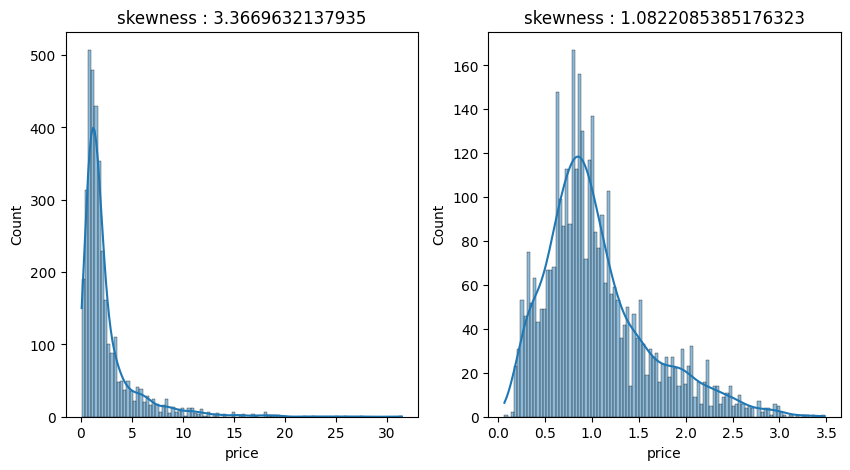

In [355]:
#check the distribution of output column
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(df['price'], bins = 100, kde = True)
plt.title(f"skewness : {df['price'].skew()}")
#since the distributon of price is right skewed we will apply log transformation to make it normally distributed
plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']), bins = 100, kde = True)
plt.title(f"skewness : {np.log1p(df['price']).skew()}")

In [356]:
#we can see the graph is noe almost normally distributed
y_transformed= np.log1p(df['price'])

In [357]:
#creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OneHotEncoder(drop = 'first'), columns_to_encode)
    ], remainder = 'passthrough'
)
preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['property_type', 'bedRoom', 'bathroom',
                                  'built_up_area', 'servant room',
                                  'store room']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['sector', 'balcony', 'agePossession',
                                  'furnishing_type', 'luxury_category',
                                  'floor_category'])])

In [358]:
#creating pieline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedRoom',
                                                   'bathroom', 'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', LinearRegression())])

In [359]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2')
scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/

array([       nan,        nan, 0.85391897, 0.85221675, 0.83932282,
       0.82553808, 0.74189135, 0.86383115, 0.84799406, 0.85706546])

In [360]:
#Because there is only one row for sector 25 and 44 we are getting above error
#if we check other values in sector they are repeating
#so to solve this problem we are Appending to df to create a duplicate rows for sector 25 and 44 to avoid above eror
df = df.append(df[(df['sector']==25) | (df['sector']==44)],ignore_index = True)

<ipython-input-360-578c8da11ea5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df[(df['sector']==25) | (df['sector']==44)],ignore_index = True)


In [361]:
x = df.drop(['price'], axis = 1)
y = df['price']

y_transformed= np.log1p(df['price'])

#creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OneHotEncoder(drop = 'first'), columns_to_encode)
    ], remainder = 'passthrough'
)
preprocessor

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedRoom',
                                                   'bathroom', 'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', LinearRegression())])

In [362]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2')

In [363]:
x_train, x_test, y_train, y_test = train_test_split(x, y_transformed, test_size = 0.2, random_state = 42)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
y_pred = np.expm1(y_pred)

print(f"accuracy : {scores.mean()}\nerror : {mean_absolute_error(np.expm1(y_test),y_pred)}")

accuracy : 0.8371835305299233
error : 0.8215454890424134


Our models accuracy is 83%  and mean absolute error is 0.82 which indicates that there might be a deviation of  82 lakhs from the actual price

In [364]:
#lets try with svm

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])
pipeline

kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2')

In [365]:
x_train, x_test, y_train, y_test = train_test_split(x, y_transformed, test_size = 0.2, random_state = 42)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
y_pred = np.expm1(y_pred)

print(f"accuracy : {scores.mean()}\nerror : {mean_absolute_error(np.expm1(y_test),y_pred)}")

accuracy : 0.8903585235788023
error : 0.5085258142716944


Our models accuracy is 89%  and mean absolute error is 0.50 which indicates that there might be a deviation of  50 lakhs from the actual price. i.e svr is working much bettter than linear regression